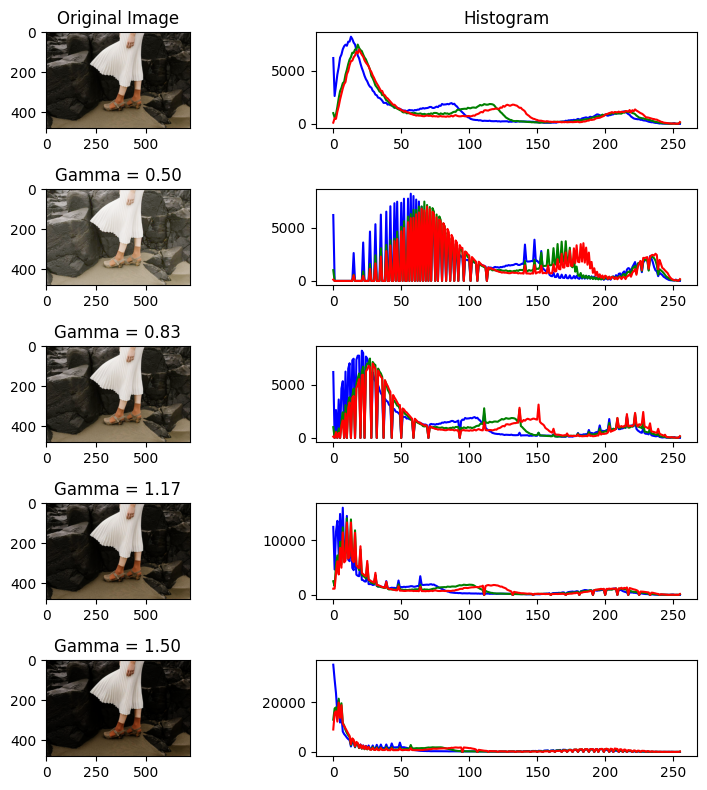

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_origin = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
img_origin_rgb = cv.cvtColor(img_origin, cv.COLOR_BGR2RGB)

# Vary gamma values from 0.5 to 1.5
gamma_values = np.linspace(0.5, 1.5 , num=4)

num_rows = len(gamma_values) +1
num_cols = 2
f, axarr = plt.subplots(num_rows, num_cols, figsize=(8,8))

# Plot the original image
axarr[0, 0].imshow(img_origin_rgb)
axarr[0, 0].set_title("Original Image")

for i, col in enumerate(('b', 'g', 'r')):
    histr = cv.calcHist([img_origin], [i], None, [256], [0, 256])
    axarr[0, 1].plot(histr, color=col)
axarr[0, 1].set_title("Histogram")

# Loop through gamma values
for idx, gamma in enumerate(gamma_values):
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    img_gamma = cv.LUT(img_origin, table)
    img_gamma_rgb = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

    axarr[idx + 1, 0].imshow(img_gamma_rgb)
    axarr[idx + 1, 0].set_title(f"Gamma = {gamma:.2f}")
    
    for i, col in enumerate(('b', 'g', 'r')):
        histr = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
        axarr[idx + 1, 1].plot(histr, color=col)
    
plt.tight_layout()
plt.show()
